# Analysing a Noisy ECG Signal

In this tutorial we'll be looking at how to analysis a particularly noisy ECG signal using HeartPy. In ECG analysis the pre-processing steps are a bit different from PPG signals due to differing peak morphology, but general analysis is handled the same way.

We'll be using data from the [MIT-BIH Noise Stress Test Dataset](https://physionet.org/content/nstdb/1.0.0/).

These data have to be loaded with the [wfdb package](https://pypi.org/project/wfdb/), but for the purpose of this tutorial we have converted four of the files to .csv data for ease of use. All files are recorded at **360 Hz**

We'll be using these files with varying signal-to-noise (SNR) ratios:

- 118e24 : SNR: 24dB
- 118e12 : SNR = 12dB
- 118e06 : SNR = 6dB
- 118e00 : SNR = 0dB

These files have noisy and non-noisy sections. To keep download size low we have extracted a two-minute section of the noisy segment to work with, since noise is what this tutorial is about.

Let's get started and see where HeartPy cannot work with the signal anymore! 

# 노이즈가 많은 심전도 신호 분석

이 튜토리얼에서는 HeartPy를 사용하여 특히 노이즈가 많은 심전도 신호를 분석하는 방법에 대해 살펴보겠습니다. 심전도 분석에서 전처리 단계는 피크 형태가 다르기 때문에 PPG 신호와 약간 다르지만 일반적인 분석은 동일한 방식으로 처리됩니다.

우리는 [MIT-BIH 노이즈 스트레스 테스트 데이터 세트](https://physionet.org/content/nstdb/1.0.0/))의 데이터를 사용할 것이다.

이러한 데이터는 [wfdb package](https://pypi.org/project/wfdb/),)와 함께 로드해야 하지만 이 튜토리얼에서는 사용 편의를 위해 4개의 파일을 .csv 데이터로 변환했습니다. 모든 파일이 **360Hz*로 기록됩니다.

SNR(신호 대 잡음) 비율이 다양한 다음 파일을 사용합니다.

- 118e24 : SNR: 24dB
- 118e12 : SNR = 12dB
- 118e06 : SNR = 6dB
- 118e00 : SNR = 0dB

이 파일에는 노이즈가 많고 노이즈가 없는 섹션이 있습니다. 다운로드 크기를 낮게 유지하기 위해 노이즈가 이 튜토리얼에 관한 것이기 때문에 작업할 노이즈 세그먼트의 2분 섹션을 추출했습니다.

이제 시작해서 HeartPy가 더 이상 신호와 함께 작동할 수 없는 부분을 알아보겠습니다!

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import heartpy as hp

sample_rate = 500.0

Let's load some data with the best SNR and visualise to see what we're working with!

**Since we'll be doing this a lot let's write a handy function right away.**

최상의 SNR로 데이터를 로드하고 어떤 작업을 수행하는지 시각화해 보겠습니다!

**많이 할 거니까 지금 바로 편리한 기능을 쓰자.**

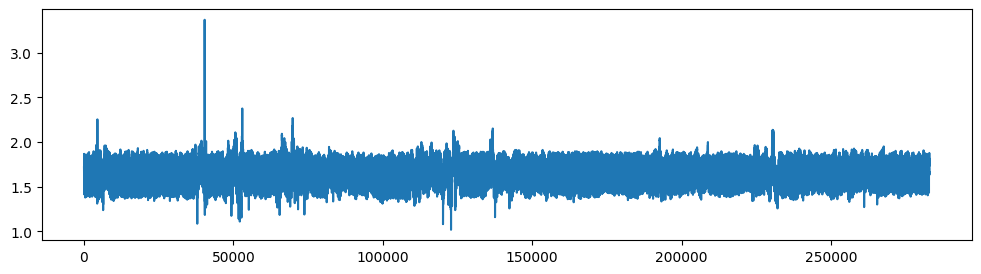

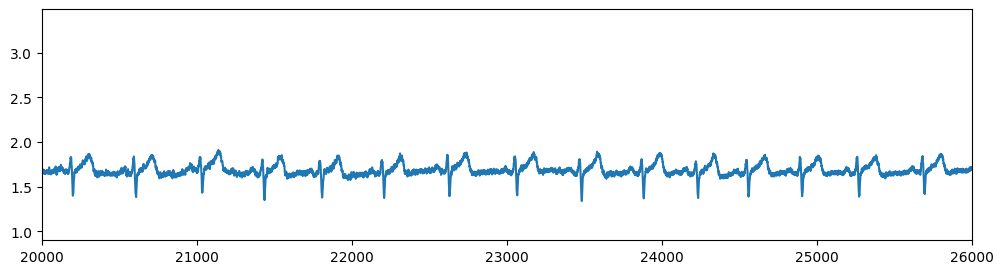

In [30]:
def load_visualise():
    '''
    loads data and annotations, plots them 
    and returns data and annotations
    '''
    
    # print(data)
    #load the data
    # ecg = hp.get_data(data)

    #get the annotations
    # annotations = hp.get_data(annotations_file)
    #explore signal
    plt.figure(figsize=(12,3))
    plt.plot(data)
    # plt.scatter(annotations, [ecg[int(x)] for x in annotations], color='green')
    plt.show()

    #and zoom in
    plt.figure(figsize=(12,3))
    plt.plot(data)
    # plt.scatter(annotations, [ecg[int(x)] for x in annotations], color='green')
    plt.xlim(20000, 26000)
    plt.show()
    
    return data

data = load_visualise()

#### That looks pretty ok.

Note that the annotations supplied with the dataset have small errors. This is because of how these are usually annotated: peaks are automatically marked and manually corrected where necessary. Due to the immense amount of work (1 hour of ECG will contain on average 3600 peaks already!) small errors are generally deemed acceptable and remain. Only peaks at strange positions are corrected. Let's see if HeartPy can do better!

-----

There's one small and one larger noise peak but otherwise there's not a lot of noise going on. Analysing this should be relatively straightforward. The biggest problem here can be summarized as **baseline wander**

HeartPy comes with a function located in ***hp.remove_baseline_wander(data, sample_rate, cutoff=0.05)*** that can help with this. It applies a notch filter around a narrow frequency range (default : 0.05Hz). This removes baseline wander but does not introduce any phase shift, meaning our QRS-complexes and thus peaks remain at the same position, which is exactly what we want.

To demonstrate (and again let's write a function):


#### 그것은 꽤 괜찮아 보인다.

데이터 세트와 함께 제공된 주석에는 작은 오류가 있습니다. 이것은 일반적으로 주석이 달린 방식 때문이다. 피크는 자동으로 표시되고 필요한 경우 수동으로 수정된다. 엄청난 양의 작업(1시간의 심전도에는 평균 3600개의 피크가 이미 포함됩니다!) 때문에 작은 오류는 일반적으로 허용 가능한 것으로 간주되며 남아 있습니다. 이상한 위치의 피크만 수정됩니다. HeartPy가 더 잘할 수 있는지 봅시다!

-----

하나는 작고 다른 하나는 더 큰 소음 피크가 있지만 다른 하나는 많은 소음이 발생하지 않습니다. 이것을 분석하는 것은 비교적 간단해야 한다. 여기서 가장 큰 문제는 **기준 이탈*로 요약될 수 있습니다.

HeartPy는 **hp.remove_remove_details(데이터, sample_rate, cutoff=0.05)***에 위치한 기능과 함께 제공됩니다. 좁은 주파수 범위(기본값: 0.05Hz) 주변에 노치 필터를 적용합니다. 이것은 기준선 방황을 제거하지만 위상 이동을 도입하지 않으며, 이는 우리의 QRS 복합체와 따라서 피크가 우리가 정확히 원하는 동일한 위치에 유지된다는 것을 의미한다.

시연하기(다시 함수를 작성해 보겠습니다)

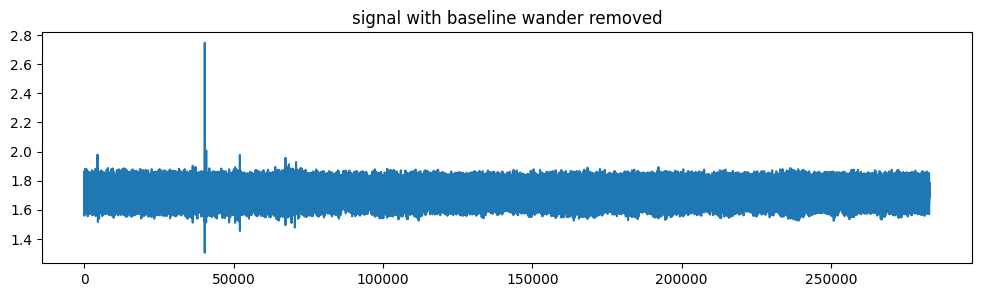

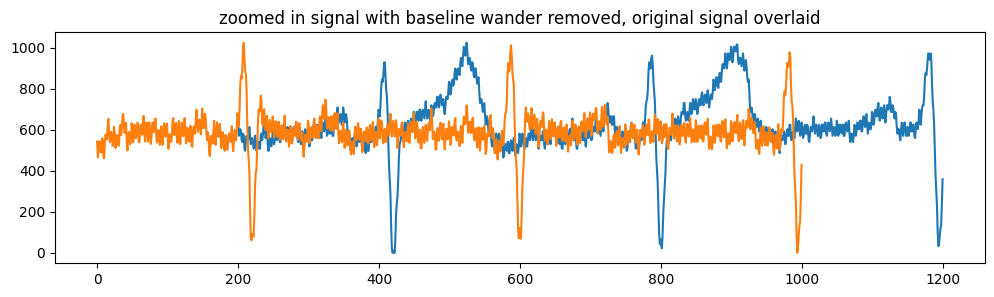

In [31]:
def filter_and_visualise(data, sample_rate):
    '''
    function that filters using remove_baseline_wander 
    and visualises result
    '''
    
    filtered = hp.remove_baseline_wander(data, sample_rate)

    plt.figure(figsize=(12,3))
    plt.title('signal with baseline wander removed')
    plt.plot(filtered)
    plt.show()

    #And let's plot both original and filtered signal, and zoom in to show peaks are not moved
    #We'll also scale both signals with hp.scale_data
    #This is so that they have the same amplitude so that the overlap is better visible
    plt.figure(figsize=(12,3))
    plt.title('zoomed in signal with baseline wander removed, original signal overlaid')
    plt.plot(hp.scale_data(data[200:1200]))
    plt.plot(hp.scale_data(filtered[200:1200]))
    plt.show()
    
    return filtered

filtered = filter_and_visualise(data, sample_rate)

#### As you can see the maxima of the peaks still overlap, which is what we're interested in.

If you ever filter and observe that peak positions start shifting, beware that you're introducing noise into your measurements. HRV measures are **especially** sensitive to outliers! 

If all peaks have a similar phase shift that is fine, but if they start changing shapes so that the maxima change position, this can be problematic.

-----------

Now let's run the analysis. We scale the data after filtering using ***hp.scale_data()*** to standardize amplitude. This is a linear operation and so doesn't affect temporal position of data. 

#### 여러분이 보시다시피, 봉우리들의 최대치는 여전히 겹칩니다. 이것이 우리가 관심을 가지고 있는 것입니다.

피크 위치가 이동하기 시작하는 것을 필터링하고 관찰하는 경우 측정에 노이즈가 포함되는지 주의하십시오. HRV 측도는 특이치에 특히 민감합니다. 

모든 피크가 유사한 위상 편이를 가지지만 최대 위치가 변경되도록 모양을 변경하기 시작하면 문제가 될 수 있습니다.

-----------

이제 분석을 해봅시다. 우리는 진폭을 표준화하기 위해 **hp.scale_data()****를 사용하여 필터링한 후 데이터를 스케일링한다. 이것은 선형 연산이므로 데이터의 시간적 위치에 영향을 미치지 않습니다.

bpm: 87.352104
ibi: 686.875274
sdnn: 85.639848
sdsd: 47.876264
rmssd: 63.968248
pnn20: 0.658228
pnn50: 0.291139
hr_mad: 48.000000
sd1: 45.217528
sd2: 99.900551
s: 14191.377998
sd1/sd2: 0.452625
breathingrate: 0.223001


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

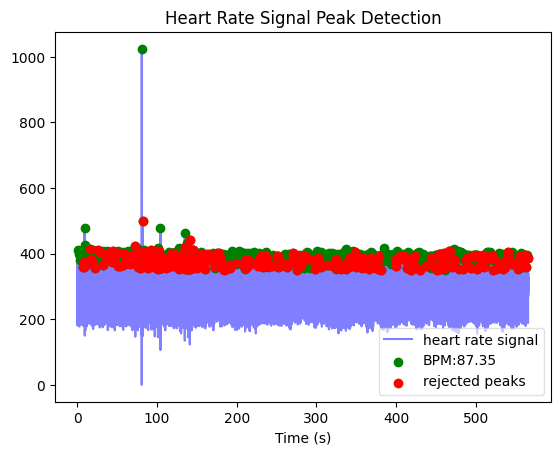

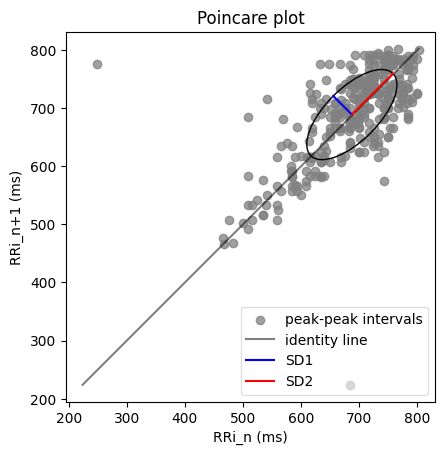

In [17]:

wd, m = hp.process(hp.scale_data(filtered), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))
        
#plot poincare
hp.plot_poincare(wd, m)


### That looks good

But then again, the signal wasn't particularly challenging actually. 

----------

Let's move on to the next one with a SNR or 12dB. We can use the function we wrote earlier:


### 좋아 보이네요

하지만 다시 말하지만, 그 신호는 실제로 특별히 어려운 것은 아니었습니다. 

----------

SNR 또는 12dB가 있는 다음 항목으로 이동합니다. 이전에 작성한 함수를 사용할 수 있습니다.

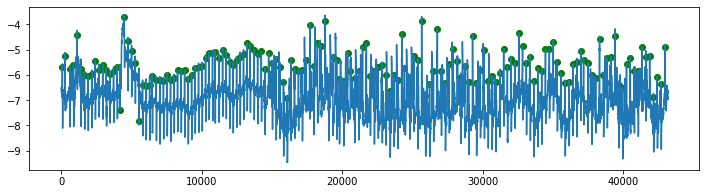

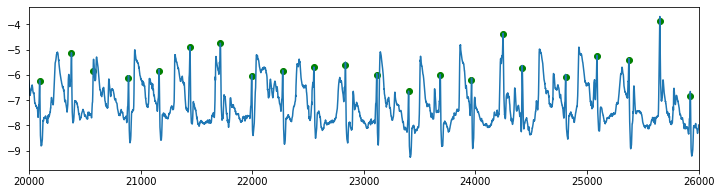

In [5]:
ecg, annotations = load_visualise('118e12.csv', '118e12_ann.csv')

#### It's getting a bit more challenging, but ecg waveforms are still quite visible in the signal

Aside from baseline wander, ***remove_baseline_wander*** will also (to a lesser extent) respond to the lower frequency noise in the signal. We can try if this cleans up the signal enough:


#### 조금 더 어려워지고 있지만 심전도 파형은 여전히 신호에서 꽤 잘 보입니다.

기준선 외에도 ***remove_baseline_wander***는 신호의 저주파 노이즈에도 (적게는) 반응합니다. 이렇게 하면 신호가 충분히 깨끗해질 수 있습니다.

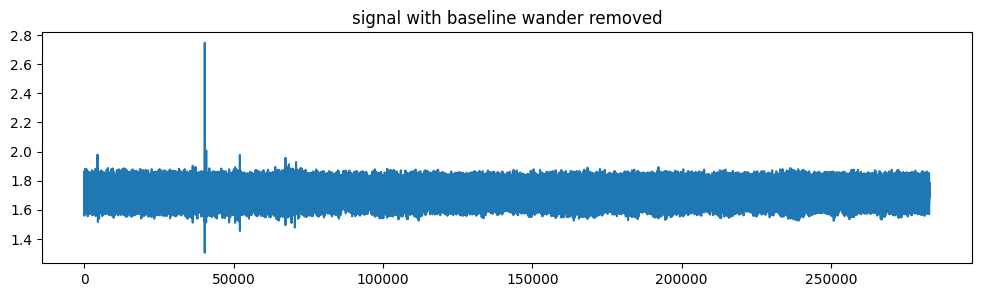

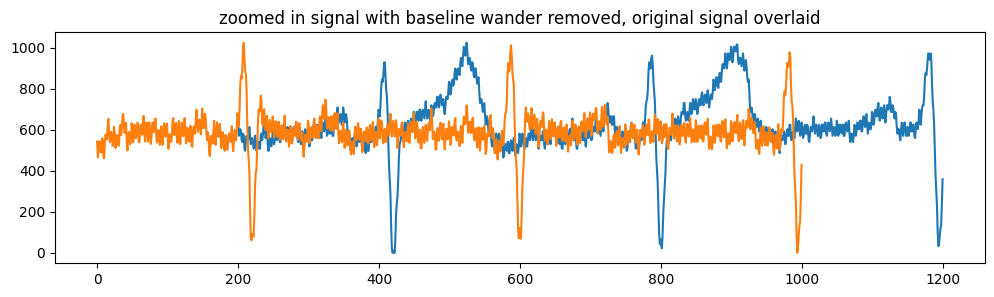

bpm: 87.352104
ibi: 686.875274
sdnn: 85.639848
sdsd: 47.876264
rmssd: 63.968248
pnn20: 0.658228
pnn50: 0.291139
hr_mad: 48.000000
sd1: 45.217528
sd2: 99.900551
s: 14191.377998
sd1/sd2: 0.452625
breathingrate: 0.223001
vlf: 3547.030675
lf: 1039.528359
hf: 1513.476488
lf/hf: 0.686848
p_total: 6100.035523
vlf_perc: 58.147705
lf_perc: 17.041349
hf_perc: 24.810945
lf_nu: 40.717837
hf_nu: 59.282163


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

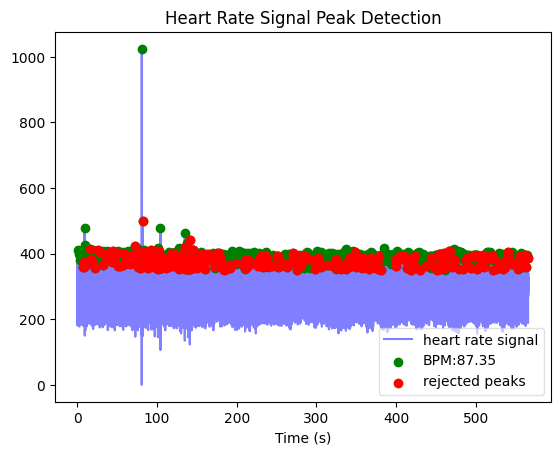

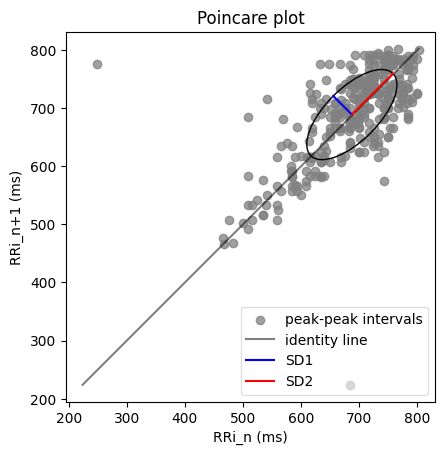

In [32]:
filtered = filter_and_visualise(data, sample_rate)

wd, m = hp.process(hp.scale_data(filtered), sample_rate,calc_freq=True)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))
        
#plot poincare
hp.plot_poincare(wd, m)

#### It works ok, but there's some rejections where they shouldn't me (correct peaks marked as incorrect).

Why is this?

ECG generally has very narrow peaks. Filtering usually keeps the maximum at the same place but can narrow the waveform further, causing issues. 

Because HeartPy was designed for much wider PPG waveforms, upsampling generally does the trick as it gives more datapoints per peak. It doesn't move or change relative peak positions:


#### 잘 작동하지만, 내가 있어서는 안 되는 일부 거부가 있습니다(잘못된 것으로 표시된 올바른 피크).

왜 이러한가?

ECG는 일반적으로 매우 좁은 피크를 갖는다. 필터링은 일반적으로 최대치를 동일한 위치에 유지하지만 파형을 더 좁혀서 문제가 발생할 수 있습니다. 

HeartPy는 훨씬 더 넓은 PPG 파형을 위해 설계되었기 때문에 업샘플링은 일반적으로 피크당 더 많은 데이터 포인트를 제공하기 때문에 유용합니다. 상대적 피크 위치를 이동하거나 변경하지 않습니다.

bpm: 91.665412
ibi: 654.554412
sdnn: 102.916946
sdsd: 62.049009
rmssd: 79.334180
pnn20: 0.648649
pnn50: 0.308108
hr_mad: 50.500000
sd1: 55.936928
sd2: 116.342740
s: 20445.030757
sd1/sd2: 0.480794
breathingrate: 0.000000
vlf: 2296.265388
lf: 711.170635
hf: 1366.723737
lf/hf: 0.520347
p_total: 4374.159760
vlf_perc: 52.496148
lf_perc: 16.258451
hf_perc: 31.245401
lf_nu: 34.225543
hf_nu: 65.774457
sd1: 55.936928
sd2: 116.342740
s: 20445.030757
sd1/sd2: 0.480794


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)


<Figure size 1200x400 with 0 Axes>

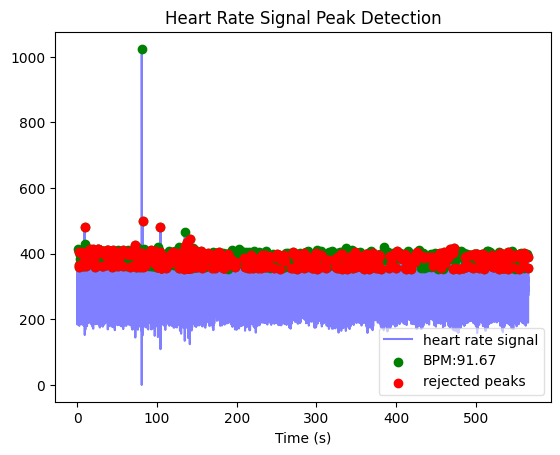

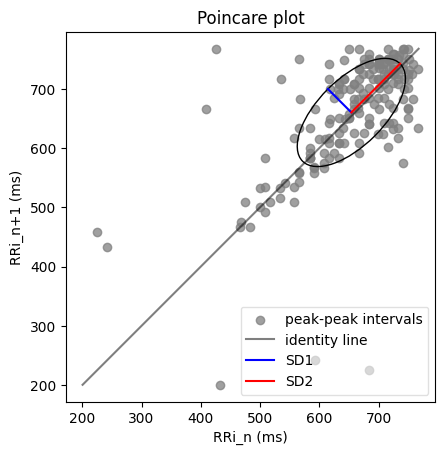

In [33]:
from scipy.signal import resample

resampled_signal = resample(filtered, len(filtered) * 4)

wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate * 4,calc_freq=True)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))
        
#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

#### That's improved the detection significantly.

If you're working with ECG and need to filter, we recommend you upsample with an even factor. A factor between 4-10 is usually sufficient.

---------

Now let's move on to a more challenging signal with an SNR of 6dB:


#### 그것은 탐지 능력을 크게 향상시켰습니다.

ECG로 작업하는 경우 필터가 필요한 경우 짝수 계수를 사용하여 업샘플링하는 것이 좋습니다. 일반적으로 4-10 사이의 요인이면 충분합니다.

---------

이제 SNR이 6dB인 보다 까다로운 신호로 넘어가 보겠습니다.

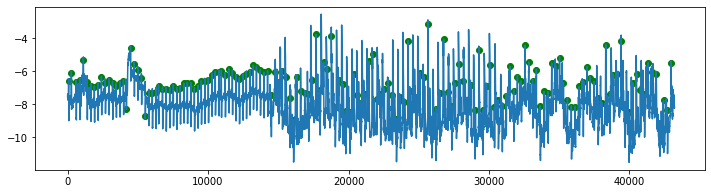

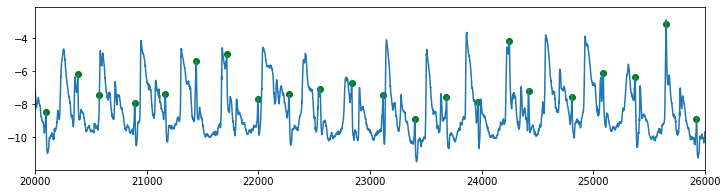

In [8]:
ecg, annotations = load_visualise('118e06.csv', '118e06_ann.csv')

#### Here we get into challenging territory

Most QRS-complexes are still visible if you know what to look for, although the amplitude of the noise is relatively quite large and at points noise spikes coincide with the QRS-complex, masking it.

Since HeartPy 1.2.4 there's a function called ***enhance_ecg_peaks(data, sample_rate)***.

The function generates a set of synthetic QRS complexes of different widths and shapes based on the sample rate, and convolves the signal with each synthetic QRS complex. The convolution will react strongly to anything that looks like it, but not to other shapes (or sizes!). This has the effect of improving signal-to-noise ratio without influencing peak positions. 

The function can be set to iterate several rounds of convolutions to improve signal to noise ratio. Beware, though, that if you use too many iterations (generally 14 to 16 or more), overtones start appearing in the signal that distort peak positions. Generally 4-5 iterations is sufficient. By default the function does 4 iterations.

Let's give it a spin:


#### 여기서 우리는 도전적인 영역으로 들어간다.

노이즈의 진폭이 상대적으로 크고 점에서 노이즈 스파이크가 QRS 복합체와 일치하여 가려지지만, 무엇을 찾아야 하는지 아는 경우 대부분의 QRS 복합체가 여전히 표시됩니다.

HeartPy 1.2.4부터는 ***enhance_ecg_peaks(데이터, sample_rate)**라는 함수가 있습니다.

이 함수는 샘플링 속도를 기반으로 폭과 모양이 다른 합성 QRS 복합체 세트를 생성하고 각 합성 QRS 복합체로 신호를 컨볼루션합니다. 나선형은 다른 모양(또는 크기)이 아닌, 보이는 모든 것에 강력하게 반응합니다. 이는 피크 위치에 영향을 미치지 않고 신호 대 잡음비를 개선하는 효과가 있다. 

이 기능은 신호 대 잡음 비를 개선하기 위해 여러 번의 컨볼루션을 반복하도록 설정할 수 있습니다. 그러나 너무 많은 반복(일반적으로 14에서 16 또는 그 이상)을 사용하면 신호에 피크 위치를 왜곡하는 신호음이 나타나기 시작한다는 점에 주의하십시오. 일반적으로 4-5번 반복하면 충분합니다. 기본적으로 함수는 4번 반복합니다.

한 번 해봅시다.

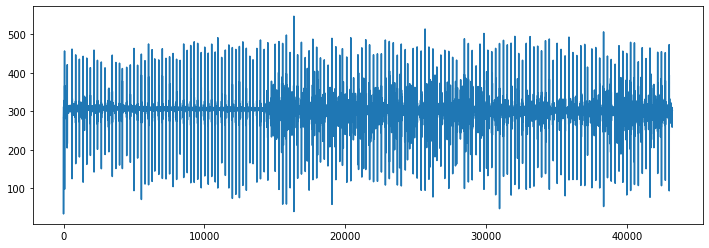

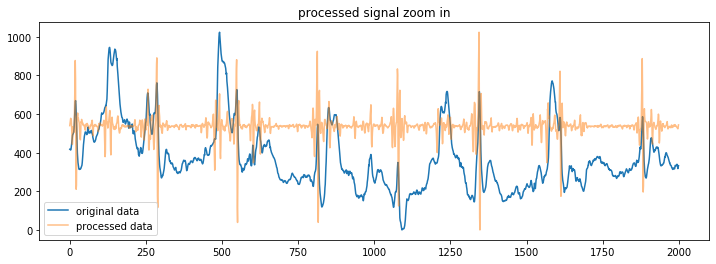

In [9]:
filtered = hp.enhance_ecg_peaks(hp.scale_data(ecg), sample_rate, 
                                aggregation='median', iterations=5)

#show filtered signal
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#zoom in on signal section and overlay filtered segment 
plt.figure(figsize=(12,4))
plt.title('original signal zoom in')
plt.plot(hp.scale_data(ecg[15000:17000]), label='original data')
plt.title('processed signal zoom in')
plt.plot(hp.scale_data(filtered[15000:17000]), alpha=0.5, label='processed data')
plt.legend()
plt.show()

#### That looks nice! 

The QRS-complexes have been enhanced a lot while remaining at the same location*.

\*actually the whole signal shifts to the right n-1 datapoints where n is the number of convolutional iterations. HeartPy corrects for this.

#### 좋아 보이네요! 

QRS 복합시설은 동일한 위치에 머무르면서도 많이 개선되었습니다*.

\*따라서 전체 신호는 오른쪽 n-1 데이터 지점으로 이동한다. 여기서 n은 컨볼루션 반복 횟수이다. HeartPy가 이를 수정합니다.

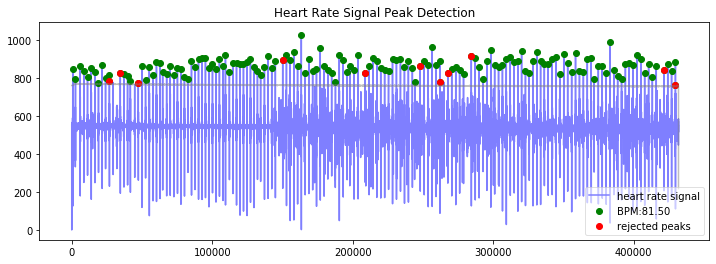

bpm: 81.500454
ibi: 736.192214
sdnn: 62.569284
sdsd: 74.268486
rmssd: 83.828045
pnn20: 0.296875
pnn50: 0.156250
hr_mad: 23.333333
sd1: 59.268926
sd2: 60.129353
s: 11196.014605
sd1/sd2: 0.985690
breathingrate: nan


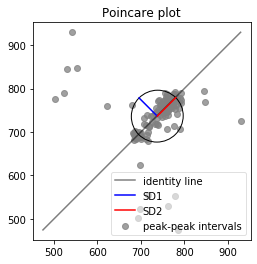

sd1: 59.268926
sd2: 60.129353
s: 11196.014605
sd1/sd2: 0.985690


In [10]:
resampled_signal = resample(filtered, len(filtered) * 10)

wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate * 10)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))
        
#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

#### That's pretty decent performance given the original (very noisy!) signal.

A few peaks have disappeared causing rejections of each subsequent peak, due to the creation of a too large peak-peak interval because of the missing peak in between. HeartPy rejects this subsequent peak and corresponding peak-peak interval so that the HRV measures are not distorted by it (they are very sensitive to outliers).

All in all, the performance is very good.

-------------

Now let's try an impossible signal with an SNR of 0dB


#### 원래 (매우 시끄러운) 신호를 고려하면 꽤 괜찮은 성능입니다.

그 사이에 누락된 피크로 인해 너무 큰 피크-피크 간격이 생성되기 때문에 몇 개의 피크가 사라져서 후속 각 피크가 거부되었습니다. HeartPy는 HRV 측정값이 이상치에 매우 민감하게 왜곡되지 않도록 이 후속 피크와 해당 피크 피크 간격을 거부합니다.

전반적으로 성능이 매우 좋습니다.

-------------

이제 SNR이 0dB인 불가능한 신호를 시도해 보겠습니다.

In [28]:
ecg = load_visualise(data)

TypeError: load_visualise() takes 0 positional arguments but 1 was given

As you can see the amplitude of many QRS complexes is really, really low compared to the noise.

Let's try the same convolutional filter and see if it can do somethhing about it.

보시다시피 많은 QRS 복합체의 진폭은 노이즈에 비해 매우 낮습니다.

동일한 컨볼루션 필터를 사용하여 이 필터를 사용할 수 있는지 확인해 보겠습니다.

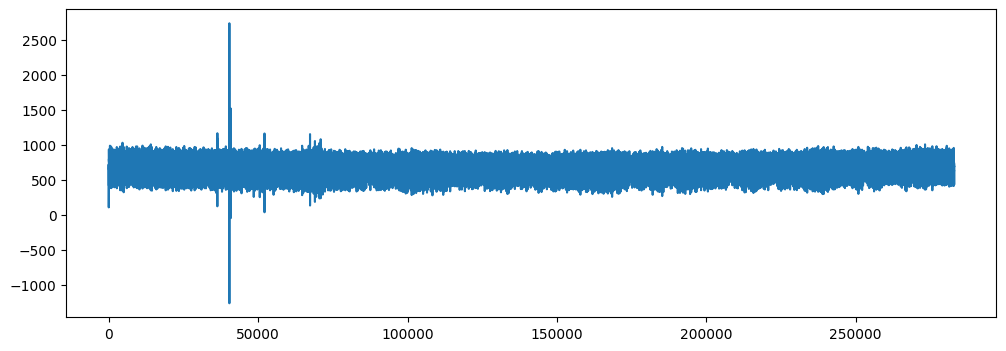

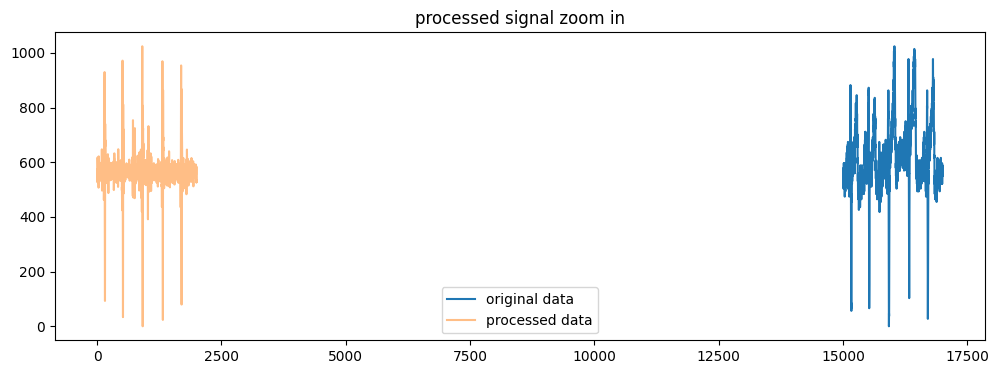

In [24]:
filtered = hp.enhance_ecg_peaks(hp.scale_data(data), sample_rate, 
                                aggregation='median', iterations=4)

plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

plt.figure(figsize=(12,4))
#plt.subplot(211)
plt.title('original signal zoom in')
plt.plot(hp.scale_data(data[15000:17000]), label='original data')
#plt.subplot(212)
plt.title('processed signal zoom in')
plt.plot(hp.scale_data(filtered[15000:17000]), alpha=0.5, label='processed data')
plt.legend()
plt.show()

c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


bpm: 84.073716
ibi: 713.659426
sdnn: 76.478719
sdsd: 32.418157
rmssd: 53.062923
pnn20: 0.701754
pnn50: 0.336257
hr_mad: 49.900000
sd1: 37.520245
sd2: 95.709438
s: 11281.589955
sd1/sd2: 0.392022
breathingrate: 0.143649
sd1: 37.520245
sd2: 95.709438
s: 11281.589955
sd1/sd2: 0.392022


<Figure size 1200x400 with 0 Axes>

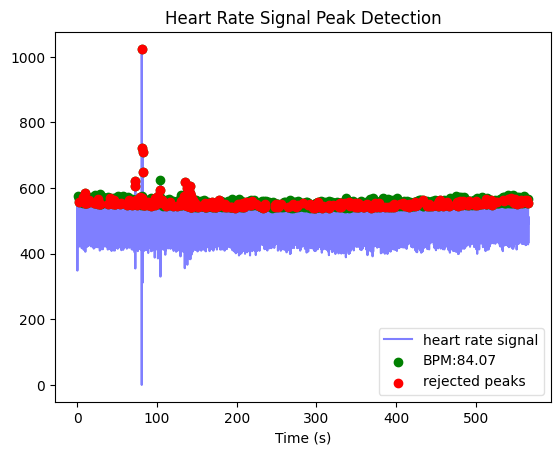

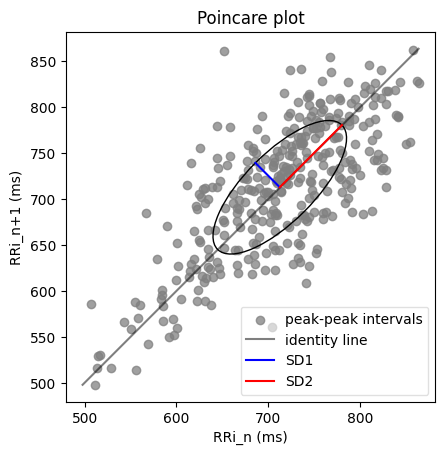

In [25]:
#filtered = hp.filter_signal(filtered, 0.05, sample_rate, filtertype='notch')

resampled_signal = resample(filtered, len(filtered) * 10)

wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate * 10)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))
        
#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

#### Too bad, that is obviously not the right solution

(for now) we've come to the end of HeartPy's capabilities.

If you're ever stuck with a signal like this, the only thing you can reasonably do is remove the noisy part and analyse the rest where the signal is good, meaning [0:14500] for this example:


#### 안타깝다, 그것은 분명히 올바른 해결책이 아니다.

(현재로서는) 하트파이의 능력은 끝이 났습니다.

이와 같은 신호에 갇혀 있는 경우, 노이즈가 많은 부분을 제거하고 나머지 신호가 양호한 부분을 분석하는 것이 합리적입니다. 이 예에서는 [0:14500]을 의미합니다.

bpm: 79.817560
ibi: 751.714286
sdnn: 89.829544
sdsd: 17.274626
rmssd: 40.532174
pnn20: 0.809524
pnn50: 0.190476
hr_mad: 27.000000
sd1: 28.499910
sd2: 47.297006
s: 4234.742632
sd1/sd2: 0.602573
breathingrate: 0.142531
sd1: 28.499910
sd2: 47.297006
s: 4234.742632
sd1/sd2: 0.602573


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


<Figure size 1200x400 with 0 Axes>

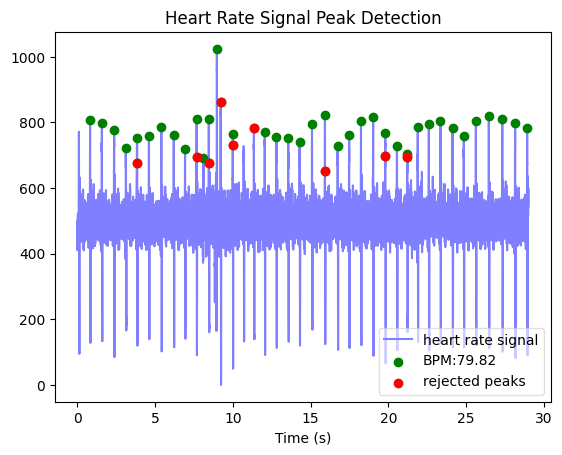

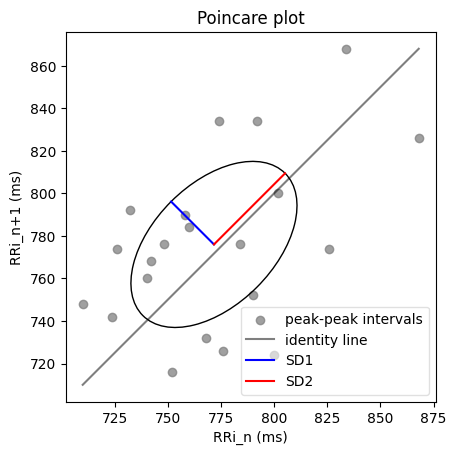

In [26]:
filtered = hp.filter_signal(data[0:14500], 0.05, sample_rate, filtertype='notch')

wd, m = hp.process(hp.scale_data(filtered), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))
        
#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

## I hope this helped!

I hope this notebook has given you an insight into what you can do if you encounter particularly noisy ECG data!

## 이게 도움이 됐길 바래요!

이 노트가 특별히 시끄러운 심전도 데이터를 발견했을 때 무엇을 할 수 있는지에 대한 통찰력을 제공해 주었기를 바랍니다!